In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [3]:
data  = pd.read_csv('train.csv')
data.shape

(614, 13)

In [4]:
df = data.copy()

In [5]:
df.shape

(614, 13)

In [6]:
pd.set_option('display.max_row',df.shape[0]) 
pd.set_option('display.max_column',df.shape[1]) 

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [8]:
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [9]:
df.info()
#On essaye de trouver les valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
df.isnull().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# renseigne les valeurs manquantes

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    
    if c == object :
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])

cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [13]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,Semiurban,N


In [14]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.000000,NaN,360.0,1.0
1,4583.0,1508.000000,128.0,360.0,1.0
2,3000.0,0.000000,66.0,360.0,1.0
3,2583.0,2358.000000,120.0,360.0,1.0
4,6000.0,0.000000,141.0,360.0,1.0
5,5417.0,4196.000000,267.0,360.0,1.0
6,2333.0,1516.000000,95.0,360.0,1.0
7,3036.0,2504.000000,158.0,360.0,0.0
8,4006.0,1526.000000,168.0,360.0,1.0
9,12841.0,10968.000000,349.0,360.0,1.0


In [15]:
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
#remplacer les nan par des valeurs qui se repètent le plus 

In [16]:
# remplacer la valeur NAN par la valeur preécedente de la même colonne
num_data.fillna(method = 'bfill', inplace=True)
num_data.isnull().sum().any()



False

In [17]:
target_value = {'Y': 0, 'N':1}
#transformer la colonne target

y = cat_data['Loan_Status']
X = cat_data.drop('Loan_Status', axis=1)

y = y.map(target_value)

In [18]:
y

0      0
1      1
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      1
10     0
11     0
12     0
13     1
14     0
15     0
16     0
17     1
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     0
27     0
28     1
29     0
30     1
31     1
32     1
33     0
34     1
35     0
36     1
37     0
38     0
39     0
40     1
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     1
49     0
50     0
51     0
52     1
53     1
54     1
55     0
56     0
57     1
58     0
59     0
60     0
61     0
62     1
63     1
64     1
65     1
66     1
67     0
68     0
69     1
70     0
71     0
72     0
73     1
74     0
75     1
76     1
77     1
78     1
79     0
80     0
81     0
82     1
83     1
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     1
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    1
108    1
109    0
110    0
1

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
#encodage remplacer les valeurs catégoriques par des valeurs numériques
encodage  = LabelEncoder()
for i in X :
    X[i]= encodage.fit_transform(X[i])
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
5,5,1,1,2,0,1,2
6,6,1,1,0,1,0,2
7,7,1,1,3,0,0,1
8,8,1,1,2,0,0,2
9,9,1,1,1,0,0,1


In [21]:
X.drop('Loan_ID', axis=1, inplace = True) 

In [22]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
5,1,1,2,0,1,2
6,1,1,0,1,0,2
7,1,1,3,0,0,1
8,1,1,2,0,0,2
9,1,1,1,0,0,1


In [23]:
# on rassemble les valeurs catégoriques et les valeurs numériques

In [24]:
X = pd.concat([X, num_data], axis=1)
y = y

In [25]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.000000,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.000000,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.000000,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.000000,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.000000,141.0,360.0,1.0
5,1,1,2,0,1,2,5417.0,4196.000000,267.0,360.0,1.0
6,1,1,0,1,0,2,2333.0,1516.000000,95.0,360.0,1.0
7,1,1,3,0,0,1,3036.0,2504.000000,158.0,360.0,0.0
8,1,1,2,0,0,2,4006.0,1526.000000,168.0,360.0,1.0
9,1,1,1,0,0,1,12841.0,10968.000000,349.0,360.0,1.0


In [26]:
# on remet dans le dataframe 

df = pd.concat([X,y], axis=1)

C:\Users\malic\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


le pourcentage de crédit accordé est 0.6872964169381107
le pourcentage de crédit non  accordé est 0.3127035830618892


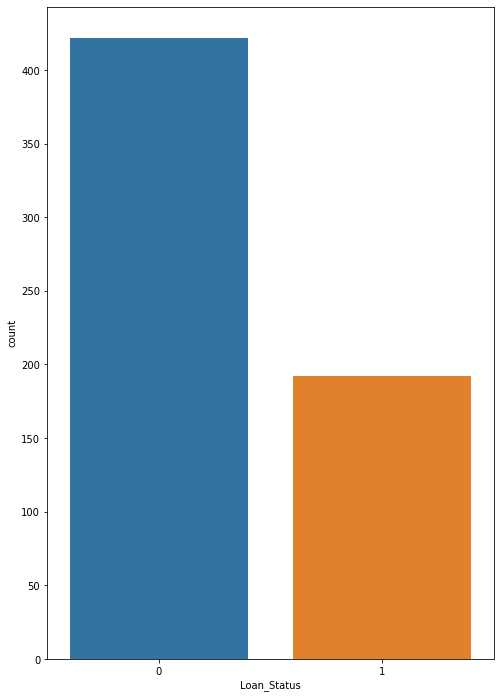

In [27]:
plt.figure(figsize = (8,12))
sns.countplot(y)

yes = y.value_counts()[0]/y.shape[0] #pour obtenir des pourcentages
no = y.value_counts()[1]/y.shape[0]


print(f'le pourcentage de crédit accordé est {yes}')
print(f'le pourcentage de crédit non  accordé est {no}')

In [28]:
y.value_counts()[0]

422

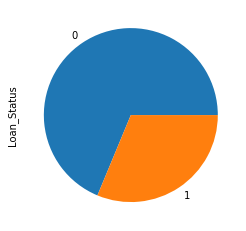

In [29]:
plt.figure()
y.value_counts().plot.pie()

C:\Users\malic\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


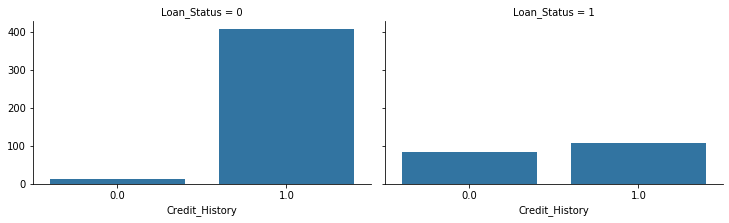

In [30]:
# Credit history
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6, size=3.2)
grid.map(sns.countplot,'Credit_History')

C:\Users\malic\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


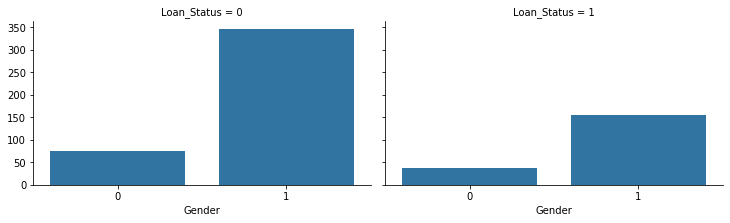

In [31]:
# sexe
grid = sns.FacetGrid(df, col='Loan_Status', aspect=1.6, size=3.2)
grid.map(sns.countplot,'Gender')


In [32]:
# salaire du client 

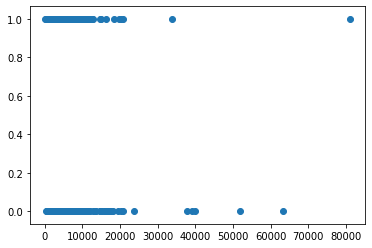

In [33]:
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

In [35]:
ss =  StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
ss.get_n_splits(X,y)

1

In [36]:
ss

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [37]:

for train, test in ss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('la taille de X_train est:', X_train.shape)
print('la taille de X_est est:', X_test.shape)
print('la taille de y_train est:', y_train.shape)
print('la taille de y_test est:', y_test.shape)

la taille de X_train est: (491, 11)
la taille de X_est est: (123, 11)
la taille de y_train est: (491,)
la taille de y_test est: (123,)


In [38]:
# On compare 3 algorithmes, KNN, LR, DTree

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import  SVC

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [57]:
processor = make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif ,k = 10))
LR = make_pipeline(processor, LogisticRegression(random_state=42))

In [62]:
models = {
    'Logistic': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(), 
    'DT': DecisionTreeClassifier(max_depth=1,random_state=42),
    'SVM': SVC(random_state=42),
    #'Lr': LR(),
}

# evaluation du model

def precision(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    if False:
        return acc
    else : 
        print(f'la precision du modele est : {acc}')
    

In [76]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision( y_test, y_pred)
    

In [77]:
for name, model in models.items():
    print(name,':')
    evaluation(model)

Logistic :


C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


la precision du modele est : 0.8048780487804879
KNN :
la precision du modele est : 0.6016260162601627
DT :
la precision du modele est : 0.8048780487804879
SVM :
la precision du modele est : 0.6991869918699187


C:\Users\malic\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [74]:
y_pred = model.predict(X_test)

In [75]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
processor = make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif ,k = 10))

In [65]:
LR = make_pipeline(processor, LogisticRegression(random_state=42))

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [67]:
LR


Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x0000015948AF41E0>))],
                          verbose=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
   

In [68]:
hyper_para = {'logisticregression__C':[1,10,100,1000],
             'pipeline__polynomialfeatures__degree': [2, 3, 4],
                   }

In [69]:
grid = RandomizedSearchCV(LR, hyper_para, cv = 4, n_iter = 40)

In [70]:
grid.fit(X_train,y_train)

print(grid.best_params_)

y_pred  = grid.predict(X_test)

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 12 is smaller than n_iter=40. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

{'pipeline__polynomialfeatures__degree': 4, 'logisticregression__C': 1}


C:\Users\malic\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision( y_test, y_pred)

In [72]:
evaluation(grid)

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 12 is smaller than n_iter=40. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\malic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

la precision du modele est : 0.7886178861788617
